<a href="https://colab.research.google.com/github/ANSHTHAKUR07/ML-proj-1/blob/main/1stMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

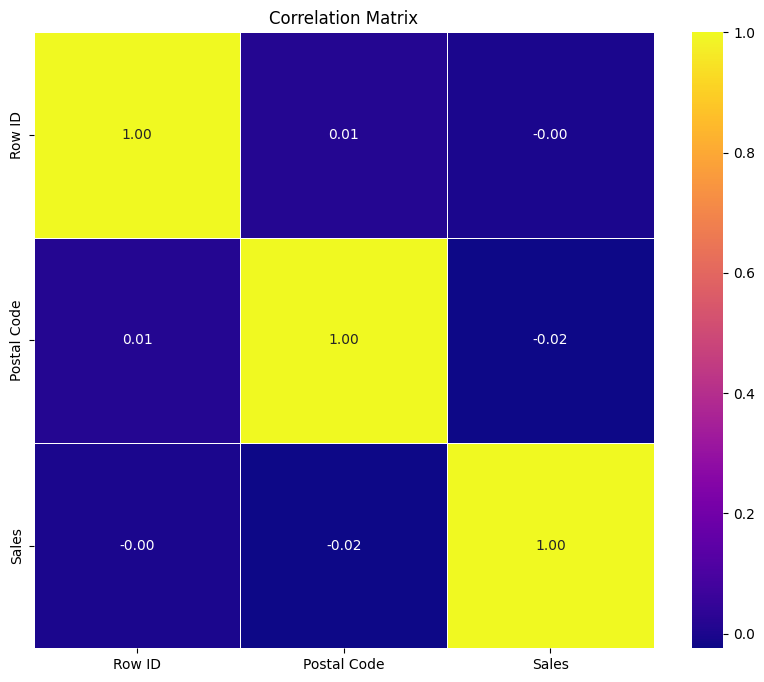

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
a = pd.read_csv("/content/train (1).csv")

# Step 3: Data Preprocessing
a.isnull()

a.dropna(inplace=True)
#Plot correlation matrix
numeric_columns = a.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

#correlation_matrix = a.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Step 4: Feature Selection
selected_features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Sales']

# Step 5: Split Data
X = a[selected_features[:-1]]
y = a[selected_features[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_data = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_data, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_data, drop_first=True)

model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("MAE:", mae)


Mean Squared Error: 381376.3160555778
R-squared: 0.2203025635609368
MAE: 224.95190122574058


Mean Squared Error: 483971.32452843845
R-squared: 0.010554181896680337


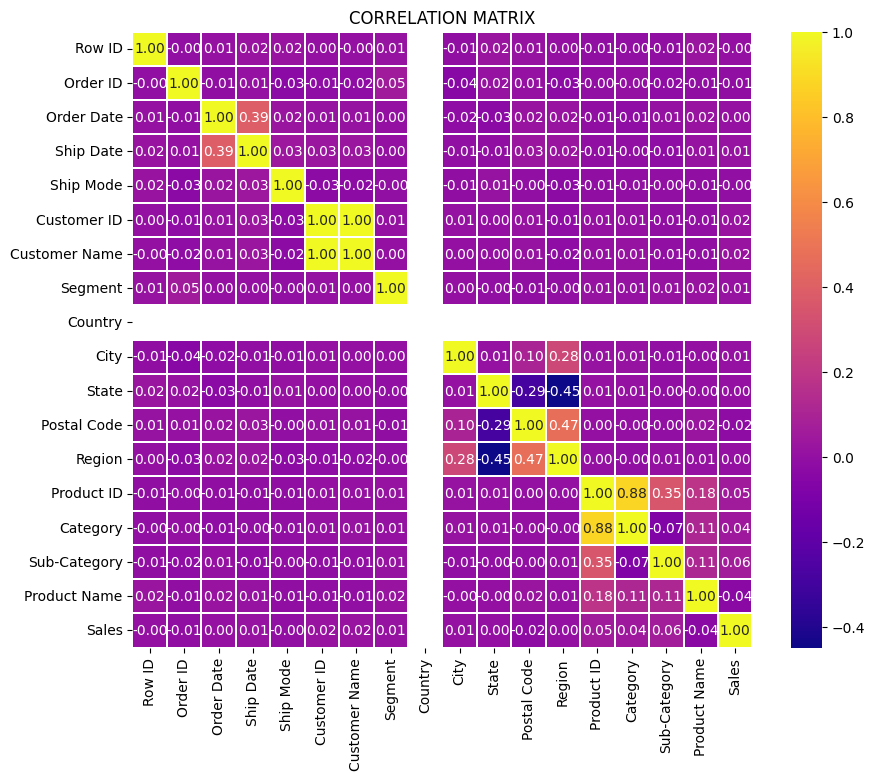

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
a = pd.read_csv("/content/train (1).csv")

# Dropping rows with missing values
a.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in a.columns:
    if a[column].dtype == 'object':
        a[column] = label_encoder.fit_transform(a[column])

# Split the data into features and target variable
X = a.drop(columns=['Sales'])
y = a['Sales']

# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Correlation Matrix Visualization
numeric_columns = a.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidth=0.3)
plt.title('CORRELATION MATRIX')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading of the dataset
data = pd.read_csv('/content/train (1).csv')

# Replace 'feature1', 'feature2', 'feature3' with actual feature column names
# Split the dataset into features and target variable
X = data[['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']]
y = data['Sales']  # Replace with actual target column

# Handling missing values based on data type
for column in X.columns:
    if X[column].dtype == 'object':
        X[column].fillna(X[column].mode()[0], inplace=True)  # Fill with the mode for categorical variables
    else:
        X[column].fillna(X[column].mean(), inplace=True)  # Fill with the mean for numerical variables

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Row ID', 'Postal Code']),  # numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name'])  # categorical columns
    ])

# Create polynomial features and apply the column transformer
poly = PolynomialFeatures(degree=2, include_bias=False)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly.transform(preprocessor.transform(X_test))

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


<ipython-input-20-ba2c6e08781f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mean(), inplace=True)  # Fill with the mean for numerical variables
<ipython-input-20-ba2c6e08781f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mode()[0], inplace=True)  # Fill with the mode for categorical variables


Mean Squared Error: 645988.2593621211
R-squared: 0.0335301453359258


In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Assuming you have a CSV file named 'dataset.csv'
data = pd.read_csv('/content/train (1).csv')
data.isnull()
data.dropna(inplace=True)
numeric_columns = a.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
# Split the dataset into features and target variable
X = data.drop('Sales', axis=1)  # Features
y = data['Sales']  # Target variable
X = pd.get_dummies(X)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 286486.4042620867
R-squared: 0.4142984092770928
